<a href="https://colab.research.google.com/github/Pawan05542/Identifying-Shopping-Trends-using-Data-Analysis-1/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install WordCloud

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [18]:
shop = pd.read_csv('/content/shopping_trends.csv')


In [19]:
shop.shape

(3900, 19)

In [20]:
shop.to_excel('/content/shopping_trends.xlsx')

In [21]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [22]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [23]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [24]:
shop.shape

(3900, 19)

In [25]:
shop.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [26]:
print(f"The unique values in the 'Gender' column are:{shop['Gender'].unique()}")
print()
print(f"The unique values in the 'Category' column are:{shop['Category'].unique()}")
print()
print(f"The unique values in the 'Size' column are:{shop['Size'].unique()}")
print()
print(f"The unique values in the 'Subscription Status' column are:{shop['Subscription Status'].unique()}")
print()
print(f"The unique values in the 'Shipping Type' column are:{shop['Shipping Type'].unique()}")
print()
print(f"The unique values in the 'Discount Applied' column are:{shop['Discount Applied'].unique()}")
print()
print(f"The unique values in the 'Promo Code Used' column are:{shop['Promo Code Used'].unique()}")
print()
print(f"The unique values in the 'Payment Method' column are:{shop['Payment Method'].unique()}")
print()

The unique values in the 'Gender' column are:['Male' 'Female']

The unique values in the 'Category' column are:['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values in the 'Size' column are:['L' 'S' 'M' 'XL']

The unique values in the 'Subscription Status' column are:['Yes' 'No']

The unique values in the 'Shipping Type' column are:['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

The unique values in the 'Discount Applied' column are:['Yes' 'No']

The unique values in the 'Promo Code Used' column are:['Yes' 'No']

The unique values in the 'Payment Method' column are:['Credit Card' 'Bank Transfer' 'Cash' 'PayPal' 'Venmo' 'Debit Card']



1 What is the overall distribution of customer ages in the dataset ?

In [27]:
shop['Age'].value_counts()

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


In [28]:
shop['Age'].mean()

44.06846153846154

In [29]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [30]:
shop['Age_category'] = pd.cut(shop['Age'], bins=[0,15,18,30,50,70], labels=['child','teen','Young Adults', 'Middle-Aged Adults', 'old'])

In [31]:
fig = px.histogram(shop, y= 'Age', x= 'Age_category')
fig.show()

2 How does the average purchase amount vary across different product ?

In [32]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [33]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [34]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


3 Which gender has the highest number of purchases ?

In [35]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

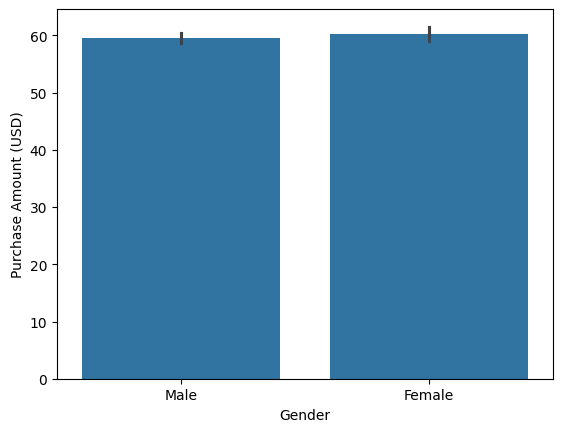

In [36]:
sns.barplot(shop,x= 'Gender', y ='Purchase Amount (USD)')

4 What are the most commonly purchased items in each category ?

In [37]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [38]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [39]:



fig = px.histogram(shop , x= 'Item Purchased', color= 'Category')
fig.show()

5 Are there any specific seasons or months where customer spending is significantly higher ?

In [40]:

shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [41]:
shop['Season'].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


In [42]:
fig = px.histogram(shop, x= 'Season' , range_y=[800,1200])
fig.show()

6 What is the average rating given by customers for each product category ?

In [43]:
shop.groupby('Category')['Review Rating'].mean()

,Review Rating
Category,
Accessories,3.768629
Clothing,3.723143
Footwear,3.790651
Outerwear,3.746914


In [44]:
shop_groupby=shop.groupby('Category')['Review Rating'].mean().reset_index()
print(shop_groupby)

      Category  Review Rating
0  Accessories       3.768629
1     Clothing       3.723143
2     Footwear       3.790651
3    Outerwear       3.746914


In [45]:
fig= px.bar(shop_groupby, x= 'Category', y= 'Review Rating')
fig.show()

7 Are there any notable differences in purchase behavior between subscribed and non-subscribed customers ?

In [46]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [47]:
shop['Subscription Status'].value_counts()

,count
Subscription Status,
No,2847
Yes,1053


<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

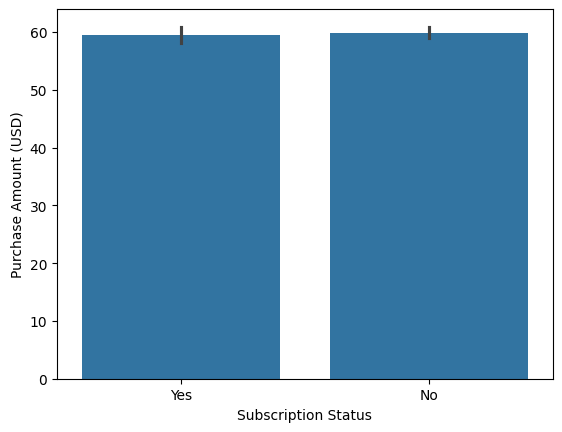

In [48]:
sns.barplot(shop, x= 'Subscription Status', y= 'Purchase Amount (USD)')

In [49]:
shop['Purchase Amount (USD)'].sum()

233081

In [50]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Subscription Status,
No,59.865121
Yes,59.491928


8 Which payment method is the most popular among customers ?

In [51]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

,Purchase Amount (USD)
Payment Method,
Venmo,61.241960
Credit Card,61.159483
Cash,59.927469
Bank Transfer,58.738924
PayPal,58.697492
Debit Card,58.638231


In [52]:
shop.groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

In [53]:
fig = px.bar(shop.groupby, x= 'Payment Method', y= 'Purchase Amount (USD)')
fig.show()